In [3]:
import numpy as np
import cv2
import os
from matplotlib import pyplot as plt
import pylab
from matplotlib import image

In [4]:
#cap = cv2.VideoCapture(0)
#while(True):
 #   ret, frame = cap.read()
 #   gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
 #   cv2.imshow('frame', gray)
 #   if cv2.waitKey(1) & 0xFF == ord('q'):
 #       break;
#cap.release()
#cv2.destroyAllWindows()

/Users/hannesbrugger/PycharmProjects/SSS/Signale-und-Systeme/Versuch2/Versuch2-Messdaten/GrayStufen.png


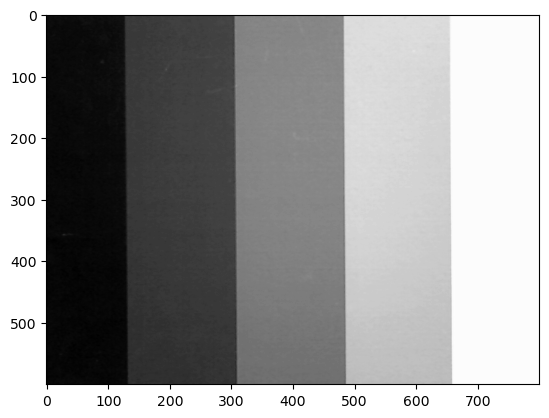

In [5]:
path = os.getcwd() + "/Versuch2-Messdaten/GrayStufen" + ".png"
print(path)
img = cv2.imread(path)
if img is None:
     print("Check file path")
img = np.array(img)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
pylab.imshow(img, cmap="gray")

# Slicing of GrayStufen

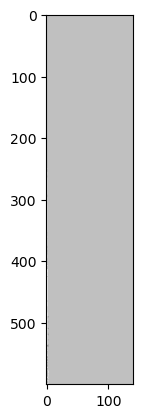

In [6]:
stufe1 = [img[i][0:130] for i in range(0,600)]
stufe2 = [img[i][150:300] for i in range(0,600)]
stufe3 = [img[i][310:490] for i in range(0,600)]
stufe4 = [img[i][500:650] for i in range(0,600)]
stufe5 = [img[i][660:800] for i in range(0,600)]
list = [stufe1,stufe2,stufe3,stufe4,stufe5]

pylab.imshow(stufe5, cmap="gray")

# Std and Mean for all

In [7]:
for i in list:
     print("Mean",np.mean(i))
     print("STD",np.std(i))

Mean 7.465115384615385
STD 3.3692255044011086
Mean 49.670455555555556
STD 4.874761579722212
Mean 109.85288888888888
STD 12.732018074402564
Mean 174.23417777777777
STD 8.325387190966326
Mean 210.99736904761906
STD 0.10353390056285736


keil zu hell

# Load all black images and make median

In [8]:
def getPics(pathin):
     pics = []
     for i in range(0,10):
          path = os.getcwd() + pathin + str(i) + ".png"
          img = cv2.imread(path)
          if img is None:
               print("Check file path")
          gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
          gray = np.array(gray)
          pics.append(gray.astype(np.double))
     return pics

In [9]:
path = "/Versuch2-Messdaten/Versuch2-S-bild"
picList = getPics(path)
dunkelbild = np.array(picList).mean(axis=0)

## Das Dunkelbild

0.0


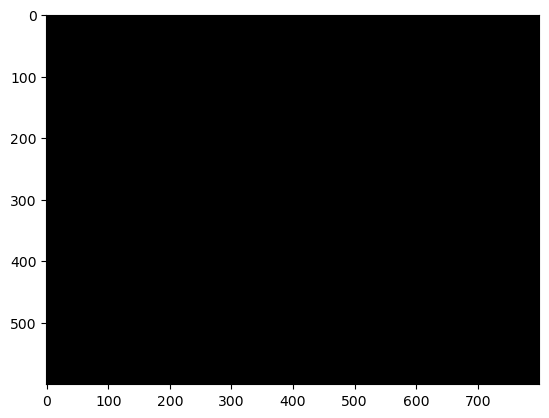

In [10]:
groessterFehler = np.max(dunkelbild)
if groessterFehler == 0:
     kontrastMax = dunkelbild
else:
     kontrastMax = dunkelbild/groessterFehler
plt.imshow(kontrastMax, cmap="gray")
print(groessterFehler)

# Dunkelbild subtrahieren

In [18]:
def SubDarkFrame(darkframe, picpath, name, show = 0):
     img = cv2.imread(picpath)
     if img is None:
          print("Check file path")
     gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
     gray = np.array(gray)
     result = gray - darkframe
     if show == 1:
          plt.imshow(result, cmap="gray")
     cv2.imwrite(name + ".png", result)


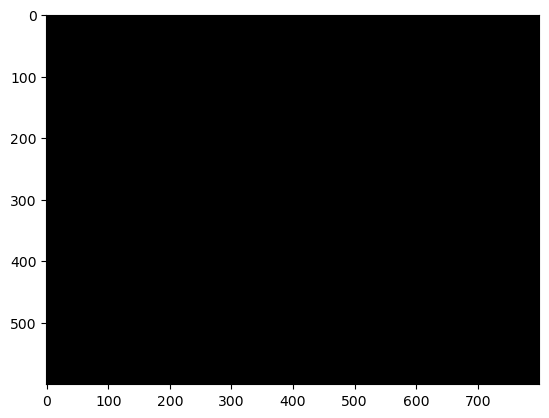

In [19]:
picpath = os.getcwd() + "/Versuch2-Messdaten/Versuch2-S-bild" + str(1) + ".png"

SubDarkFrame(dunkelbild, picpath, "dunkelbild", show = 1)

# Erstellen vom Weißbild

kontrast - min / (max - min)

211.0


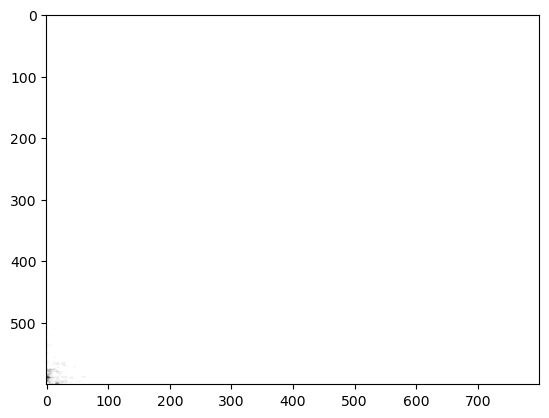

In [31]:
path = "/Versuch2-Messdaten/Versuch2-bild"
picList = getPics(path)
mittelwert = np.array(picList).mean(axis=0)

weisbild = mittelwert - dunkelbild
kontrastMax = weisbild - np.min(weisbild)
kontrastMax = (kontrastMax) / np.max(kontrastMax)
cv2.imwrite("white.png", weisbild)
plt.imshow(kontrastMax, cmap='gray')
print(np.max(weisbild))

In [32]:
def NormWhiteFrame(whiteframe):
     whiteframe = whiteframe.astype(np.double)
     whiteframe = whiteframe / np.mean(whiteframe)
     return whiteframe

True

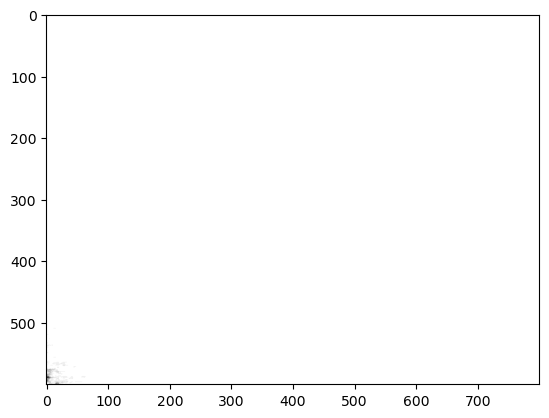

In [33]:

normiertesWeisBild = NormWhiteFrame(weisbild)
plt.imshow(normiertesWeisBild, cmap="gray")
cv2.imwrite("normiertesWeisbild.png", normiertesWeisBild)

True

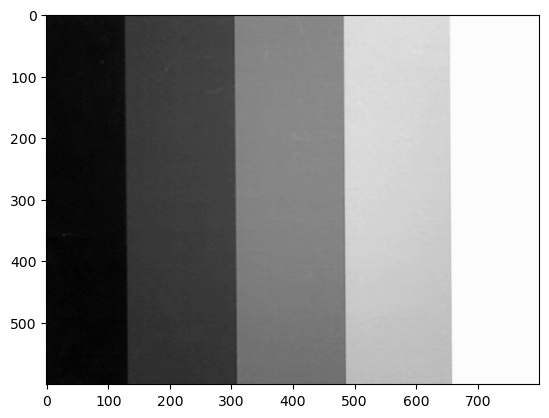

In [34]:
normiertesKoregierteGrayStufen = (img-dunkelbild) / normiertesWeisBild
plt.imshow(normiertesKoregierteGrayStufen, cmap="gray")
cv2.imwrite("normiertesKoregierteGrayStufen.png", normiertesKoregierteGrayStufen)

Mean 7.4651594005923405
STD 3.3691929075651097
Mean 49.67037080975461
STD 4.874753262593449
Mean 109.852701462159
STD 12.73199635152812
Mean 174.23388050619477
STD 8.325372986514243
Mean 210.9970090521078
STD 0.1035337239173404


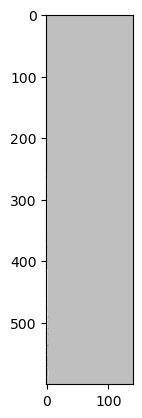

In [30]:
img = normiertesKoregierteGrayStufen
stufe1 = [img[i][0:130] for i in range(0,600)]
stufe2 = [img[i][150:300] for i in range(0,600)]
stufe3 = [img[i][310:490] for i in range(0,600)]
stufe4 = [img[i][500:650] for i in range(0,600)]
stufe5 = [img[i][660:800] for i in range(0,600)]
list = [stufe1,stufe2,stufe3,stufe4,stufe5]

pylab.imshow(stufe5, cmap="gray")

for i in list:
     print("Mean",np.mean(i))
     print("STD",np.std(i))
